In [2]:
%load_ext autoreload
%autoreload 2

In [7]:
from pathlib import Path
import sys
import os
sys.path.append(str(Path(os.getcwd()).parent.parent))

from src.evaluator.evaluation import *
from src.evaluator.methods.likelihood_scorer import LikelihoodErrorCount
from src.evaluator.methods.overlay_gt_scorer import OverlayGtScorer
from src.evaluator.methods.hybrid_overlay_gt_scorer import HybridOverlayGtScorer
from src.evaluator.page_parser import *

In [ ]:
# define dataset path with ground truth (with marginalia, without marginalia) for ground truth calculation
dataset_path = Path("../../data")
# path to to load predictions from csv files 
csv_path = dataset_path / "last_version"

In [26]:
gt_annotated_pages, original_gt_page = calculate_annotated_pages_with_gt_scorer(
    dataset_path, HybridOverlayGtScorer()
)

pred_annotated_pages = calculate_annotated_pages_with_pred_scorer(
    dataset_path, LikelihoodErrorCount(data_base_dir=csv_path)
)

Saving ..\..\data\likelihood\output\overlay_visualization\1724666584_00000024.bin_error_overlay.png
Saving ..\..\data\likelihood\output\overlay_visualization\1724666584_00000095.bin_error_overlay.png
Saving ..\..\data\likelihood\output\overlay_visualization\1724666584_00000133.bin_error_overlay.png
Saving ..\..\data\likelihood\output\overlay_visualization\1724666584_00000151.bin_error_overlay.png
Saving ..\..\data\likelihood\output\overlay_visualization\1724666584_00000169.bin_error_overlay.png
Saving ..\..\data\likelihood\output\overlay_visualization\1734305185_00000029.bin_error_overlay.png
Saving ..\..\data\likelihood\output\overlay_visualization\1734305185_00000200.bin_error_overlay.png
Saving ..\..\data\likelihood\output\overlay_visualization\1734305185_00000201.bin_error_overlay.png
Saving ..\..\data\likelihood\output\overlay_visualization\1734305185_00000235.bin_error_overlay.png
Saving ..\..\data\likelihood\output\overlay_visualization\1734305185_00000239.bin_error_overlay.png


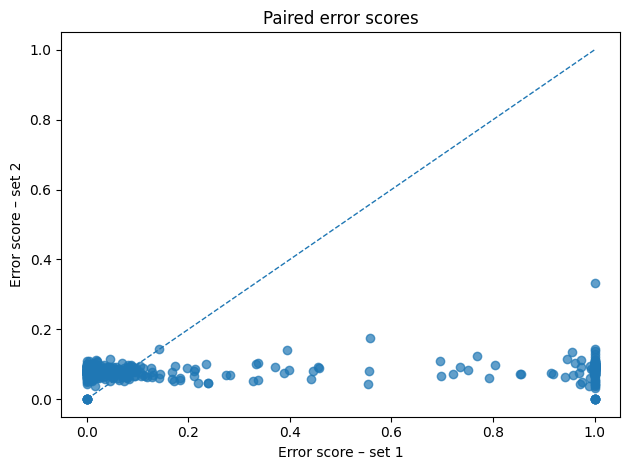

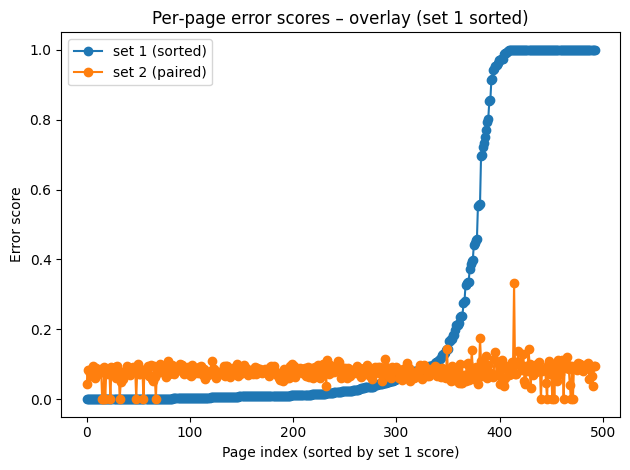

{'rmse': 0.43288275831650086,
 'spearman_r': 0.10712507828488943,
 'spearman_p': 0.01734200919171584,
 'pearson_r': 0.09200857835782321,
 'pearson_p': 0.041144649823001075,
 'mean_1': 0.2552757285475008,
 'mean_2': 0.0793452678015177,
 'n_pages': 493}

In [27]:
# save overlay visualizations for predictions
print_error_visualization_for_pages(
    pred_annotated_pages, dataset_path / "likelihood/output/overlay_visualization"
)
# save xml files for predictions
save_pages(gt_annotated_pages, dataset_path / "likelihood/output/xml")

# Statistics
calulate_statistics_for_page_sets(gt_annotated_pages, pred_annotated_pages, True)